In [99]:
import random
gece

In [15]:
# Koşullu vardiya ataması
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import duckdb

#Class metodu üzerine kurulu bi algoritma

class laborant():
    def __init__(self, İsim, cihaz1, cihaz2, Tecrübe):
        self.İsim = İsim
        self.cihaz1 = cihaz1
        self.cihaz2 = cihaz2
        self.Tecrübe = Tecrübe
        self.Cihazlar = [cihaz1]
        if cihaz2 != "":
            self.Cihazlar.append(cihaz2)
        print("+")



#Görece büyük verilerle kullanılması için csv okuma apsiyonu


tümlaborantlar=[]
yöntemsorusu=input("hangi yöntemle giriş yapmak istersin (csv/input)?: ")
print("!!! liste tamamlandıysa q yaz !!!")

if yöntemsorusu.lower()=="csv":
    df=pd.read_csv("deneme123.csv")
    df.columns = df.columns.str.strip()
    df.columns = df.columns.str.replace(" ", "_")
    df.index=np.arange(1,len(df)+1)
    for index , row in df.iterrows():
        Cihazlar=str(row["Cihazlar"]).split(",")
        cihaz1=Cihazlar[0]
        cihaz2 = Cihazlar[1] if len(Cihazlar) > 1 and not pd.isna(Cihazlar[1]) else ""
        x = laborant(
            İsim=row["İsim"],
            Tecrübe=row["Tecrübe"],
            cihaz1=cihaz1,
            cihaz2=cihaz2
        )
        tümlaborantlar.append(x)
    print(f"Toplam {len(tümlaborantlar)} laborant yüklendi.")


#Manuel input seçildiği taktirde kullanılması için while true döngüsü içinde input alma


else:
    while True:
        kişi = input("laborantın ismi: ")
        if kişi.lower() == "q":
            print("liste kapatıldı")
            break
        cihaz1 = input("kullanabildiği cihaz: ")
        if cihaz1.lower() == "q":
            print("liste kapatıldı")
            break  

        cihaz2 = input(f"{kişi} adlı kişinin kullanabilidiği ikinci cihaz: (eğer kullanabildiği ikinci cihaz yoksa boş geçin) ")
        if cihaz2.lower() == "q":
            print("liste kapatıldı")
            break

        Tecrübe = input(f"{kişi} adlı kişinin kaç yıl tecrübesi var?: ")
        if Tecrübe.lower() == "q":
            print("liste kapatıldı")
            break
        try:
            Tecrübe = int(Tecrübe)
        except ValueError:
            print("Hata: Tecrübe tam sayı olmalı!")
            continue
        yenikişi = laborant(kişi, cihaz1, cihaz2, Tecrübe, Ham_Maaş)
        tümlaborantlar.append(yenikişi)
gece=random.sample(tümlaborantlar,15)
gündüz=[i for i in tümlaborantlar if i not in gece]


#Rastgele atanan vardiyaların okutma kısmı


print("")
print("gece vardiyası:")
for kişi in gece:
    print(kişi.İsim + "-" + kişi.cihaz1 + "/" + kişi.cihaz2)
print("")
print("gündüz vardiyası:")
for kişi in gündüz:
    print(kişi.İsim + "-" + kişi.cihaz1 + "/" + kişi.cihaz2)

öncekicihaz={}
gündüzkayıtları=[]
gecekayıtları=[]
alternatifler=[]
print("")
print("")
print("")


#Aynı kişinin üst üste iki kere aynı bölümde çalışmaması için geliştirilmiş mantık



for i in gündüz:
    öncekicihaz[i.İsim]=None
for gün in range(1,8):
    cihazkapasite={}
    print(f"gün {gün} gündüz")
    for i in ["A","B","C","D","E","F"]:
        cihazkapasite[i]=0
    for kişi in gündüz:
        cihazseçenekleri=[]
        for cihaz in kişi.Cihazlar:
            if cihaz!=öncekicihaz[kişi.İsim] and cihazkapasite[cihaz]<10:
                cihazseçenekleri.append(cihaz)
        if len(cihazseçenekleri) > 0:
            seçilen=random.choice(cihazseçenekleri)
        else:
            alternatifler = []
            for c in kişi.Cihazlar:
                if cihazkapasite[c] < 6:
                    alternatifler.append(c)
        if len(alternatifler) > 0:
            seçilen = random.choice(alternatifler)
        else:
            print(f"Dikkat! {kişi.İsim} için kapasitesi dolu cihaz seçiliyor.")
            seçilen=kişi.Cihazlar[0]
        print(f"{kişi.İsim} -> {seçilen}")
        öncekicihaz[kişi.İsim]=seçilen
        cihazkapasite[seçilen]+=1
        gündüzkayıtları.append({"Gün": gün, "İsim":kişi.İsim, "Cihaz":seçilen, "Vardiya": "Gündüz"})

for i in gece:
    öncekicihaz[i.İsim]=None
for gün in range(1,8):
    cihazkapasite={}
    print(f"gün {gün} gece")
    for i in ["A","B","C","D","E","F"]:
        cihazkapasite[i]=0
    for kişi in gece:
        cihazseçenekleri=[]
        for cihaz in kişi.Cihazlar:
            if cihaz!=öncekicihaz[kişi.İsim] and cihazkapasite[cihaz] < 6:
                cihazseçenekleri.append(cihaz)
        if len(cihazseçenekleri) > 0:
            seçilen=random.choice(cihazseçenekleri)
        else:
            alternatifler = []
            for c in kişi.Cihazlar:
                if cihazkapasite[c] < 6:
                    alternatifler.append(c)
        if len(alternatifler) > 0:
            seçilen = random.choice(alternatifler)
        else:
            print(f"Dikkat! {kişi.İsim} için kapasitesi dolu cihaz seçiliyor.")
            seçilen=kişi.Cihazlar[0]
        print(f"{kişi.İsim} -> {seçilen}")
        öncekicihaz[kişi.İsim]=seçilen
        cihazkapasite[seçilen]+=1
        gecekayıtları.append({"Gün": gün, "İsim":kişi.İsim, "Cihaz":seçilen, "Vardiya": "Gece"})


#Sonucu dataframe haline getirme


kayıtlar=gecekayıtları+gündüzkayıtları
df=pd.DataFrame(kayıtlar)
print(df)

hangi yöntemle giriş yapmak istersin (csv/input)?:  csv


!!! liste tamamlandıysa q yaz !!!
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
Toplam 40 laborant yüklendi.

gece vardiyası:
Gizem-C/A
Hakan-C/B
Okan-D/
Özge-E/
Kaan-D/
Arda-F/E
Kerem-F/A
Selin-B/
Tuna-A/
Can-B/A
Deniz-C/
Emre-C/A
Ali-B/
Ece-B/A
Gül-D/

gündüz vardiyası:
Ahmet-B/D
Mehmet-E/
Ayşe-F/
Fatma-F/
Veli-D/B
Zeynep-C/F
Elif-F/
Mert-A/
Burak-B/
Berk-D/
Cem-E/
Sevgi-F/D
Aslı-D/E
Eren-F/
Buse-E/B
Derya-F/
Merve-F/
Barış-A/E
Seda-A/D
Furkan-E/B
Yasin-D/
Tuğçe-A/
Melis-B/E
Onur-F/
Cansu-C/A



gün 1 gündüz
Dikkat! Ahmet için kapasitesi dolu cihaz seçiliyor.
Ahmet -> B
Dikkat! Mehmet için kapasitesi dolu cihaz seçiliyor.
Mehmet -> E
Dikkat! Ayşe için kapasitesi dolu cihaz seçiliyor.
Ayşe -> F
Dikkat! Fatma için kapasitesi dolu cihaz seçiliyor.
Fatma -> F
Dikkat! Veli için kapasitesi dolu cihaz seçiliyor.
Veli -> D
Dikkat! Zeynep için kapasitesi dolu cihaz seçiliyor.
Zeynep -> C
Dikkat! Elif için kapasitesi dolu cihaz seçiliyor.
Elif -> F
Dikkat! Mer

In [23]:
#SQL Sorgulaarı

sorgu1=duckdb.query("""
select Cihaz , Vardiya , count(*) as "vardiya bazlı cihaz kullanım sayısı"
from df
group by Vardiya , Cihaz;
""").to_df()
print(sorgu1)

   Cihaz Vardiya  vardiya bazlı cihaz kullanım sayısı
0      E    Gece                                    7
1      E  Gündüz                                   34
2      D    Gece                                   39
3      D  Gündüz                                   16
4      C    Gece                                   22
5      C  Gündüz                                    8
6      B    Gece                                   22
7      B  Gündüz                                   15
8      A    Gece                                   13
9      A  Gündüz                                   34
10     F    Gece                                    2
11     F  Gündüz                                   68


In [31]:
sorgu2=duckdb.query("""
select Cihaz , count(*) as "toplam kullanım"
from df
group by Cihaz; 
""").to_df()
print(sorgu2)

  Cihaz  toplam kullanım
0     F               70
1     A               47
2     D               55
3     E               41
4     C               30
5     B               37


In [95]:
sorgu3=duckdb.query("""
select Cihaz , Vardiya , count(*) as "vardiya bazlı cihaz kullanım sayısı"
from df
group by Cihaz , Vardiya 
""").to_df()
print(sorgu3)

   Cihaz Vardiya  vardiya bazlı cihaz kullanım sayısı
0      F    Gece                                    2
1      E  Gündüz                                   34
2      B    Gece                                   22
3      B  Gündüz                                   15
4      D  Gündüz                                   16
5      C    Gece                                   22
6      A    Gece                                   13
7      C  Gündüz                                    8
8      E    Gece                                    7
9      F  Gündüz                                   68
10     D    Gece                                   39
11     A  Gündüz                                   34


Text(0.5, 1.0, 'Cihazların Toplam Kullanım Sayıları')

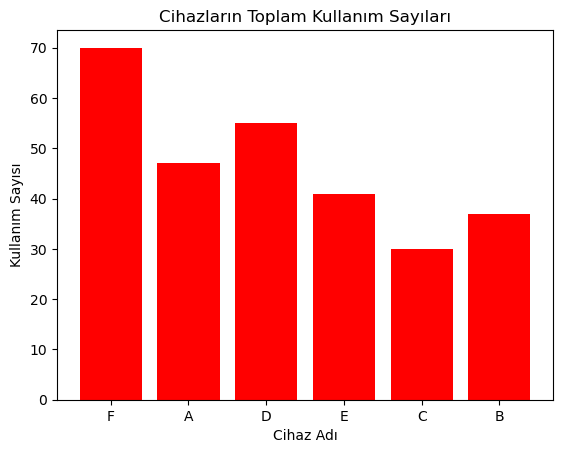

In [89]:
plt.bar(sorgu2["Cihaz"], sorgu2["toplam kullanım"], color="red")
plt.ylabel("Kullanım Sayısı")
plt.xlabel("Cihaz Adı")
plt.title("Cihazların Toplam Kullanım Sayıları")

Text(0.5, 1.0, 'Cihazların Toplam Kullanım Oranları')

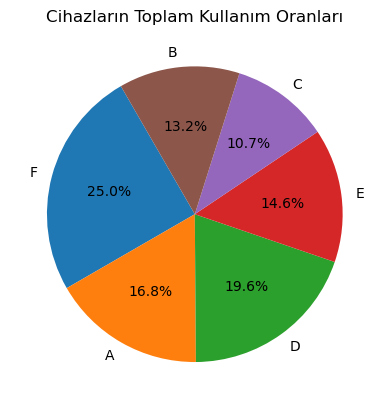

In [85]:
plt.pie(sorgu2["toplam kullanım"],
labels=sorgu2["Cihaz"],
autopct="%1.1f%%")
plt.title("Kullanım Sayılarının Toplama Oranları")

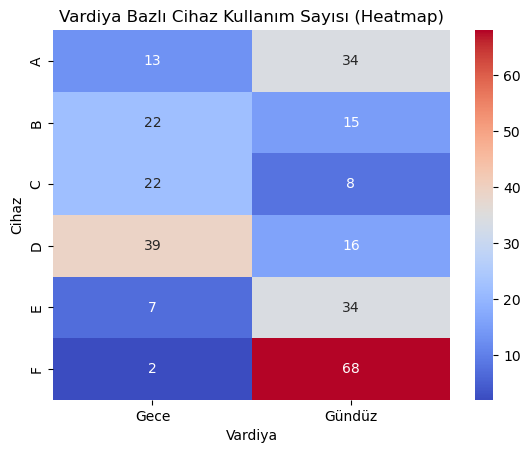

In [99]:
pivot = sorgu3.pivot(index="Cihaz", columns="Vardiya", values="vardiya bazlı cihaz kullanım sayısı")
sns.heatmap(pivot, annot=True, cmap="coolwarm")
plt.title("Vardiya Bazlı Cihaz Kullanım Sayısı (Heatmap)")
plt.show()